<h2>Imports</h2>
<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scikit-Learn</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import copy

# Scikit_Learn Imports
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron


<h2>Load Dataset</h2>

In [2]:
mnist = fetch_openml('mnist_784')

e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no3\.venv\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = mnist.data
y = mnist.target

<h2>Visualize Dataset</h2>
<ul>
    <li>Some of data</li>
    <li>Average data</li>
</ul>

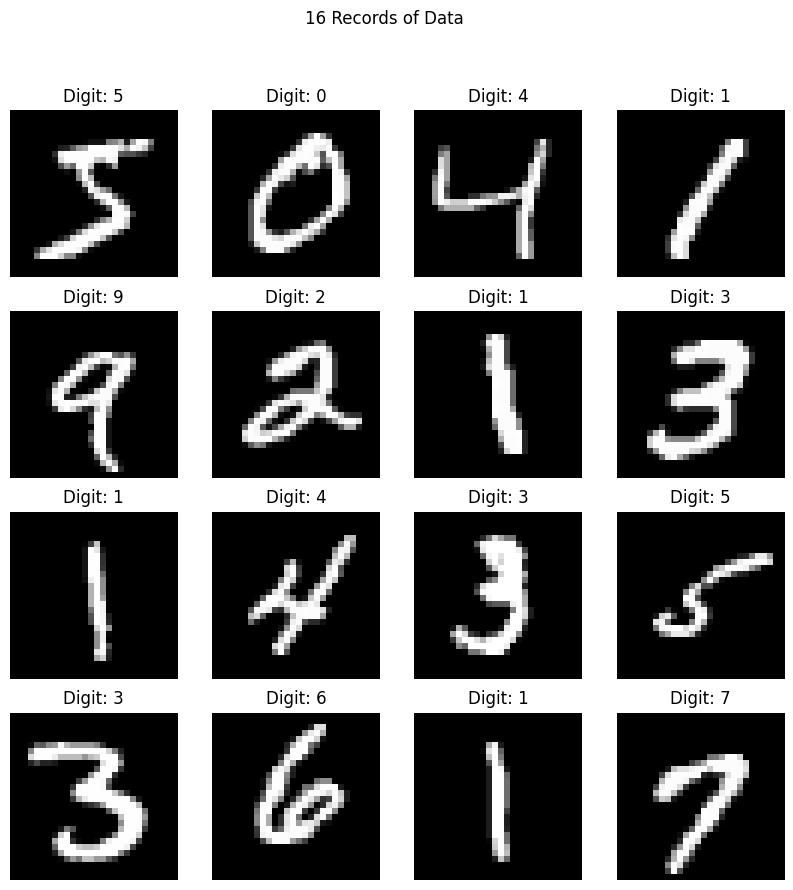

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image = X.iloc[i].values.reshape(28, 28)  # Reshaping flat imgae to its first shape
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Digit: {y[i]}")
    ax.axis('off')

plt.suptitle("16 Records of Data")
plt.show()

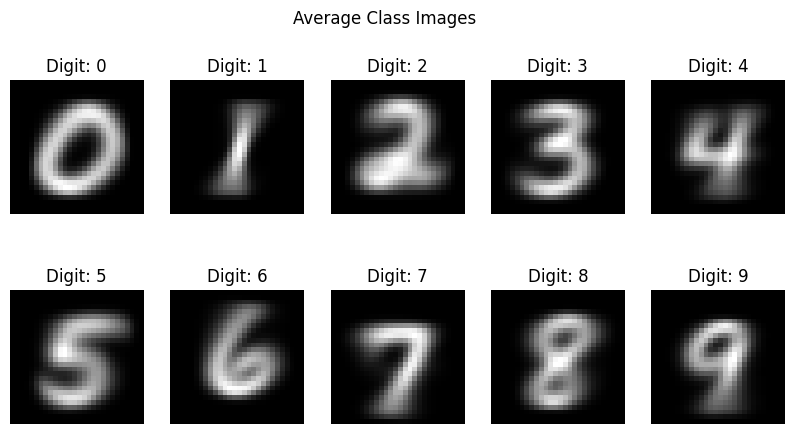

In [5]:

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for digit in range(10):
    # Extract all images for this digit
    digit_images = X[y == str(digit)]

    # Calculate the average image
    average_image = np.array(np.mean(digit_images, axis=0)).reshape(28, 28)

    # Plot the average image
    ax = axes[digit // 5, digit % 5]  # Calculate the grid index here
    ax.imshow(average_image, cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.suptitle("Average Class Images")
plt.show()


<h2>Preprocessing</h2>
<ul>
    <li>Missing Values (Already Done)</li>
    <li>Drop Duplicates (Already Done)</li>
    <li>Handle Categorical Feaetures (Already Done)</li>
    <li>Normalizing (Using Standard Normalization)</li>
</ul>
<h4><b>NOTE</b></h4>
<p>Preprocessing can be really chalenging on datasets but MNIST is a really famous and clean dataset so I just applied normalization before scalinng down data because of better perfomance of LDA with normalization and skiped other steps of pre processing</p>

In [6]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

<h2>Split Train & Test data</h2>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Results
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


<h2>Appling LDA</h2>
<p><b>Approach:</b> Scale down data to 2, 3, 4, ..., 9 and compare them</p>
<p><b>NOTE:</b> Original data dimension size is 784</p>

In [8]:
# Define the range of dimensions to scale down (2, 3, 4, ..., 8, 9)
dimensions = range(2, 10)

# Define Repeated K-Fold (Folds=5, Repeates=10)
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Dictionary to store accuracies for each dimension
accuracy_dict = {dim: [] for dim in dimensions}

for dim in dimensions:
    
    lda = LDA(n_components=dim) # Apply LDA to reduce dimensions
    X_reduced = lda.fit_transform(X_train, y_train)

    # Perform repeated K-Fold CV
    for train_index, val_index in rkf.split(X_reduced):
        X_train_fold, X_val_fold = X_reduced[train_index], X_reduced[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train the model
        perceptron = Perceptron()
        perceptron.fit(X_train_fold, y_train_fold)

        # Evaluation
        accuracy = accuracy_score(y_val_fold, perceptron.predict(X_val_fold))
        accuracy_dict[dim].append(accuracy)


<h2>Boxplots of all dimensions</h2>

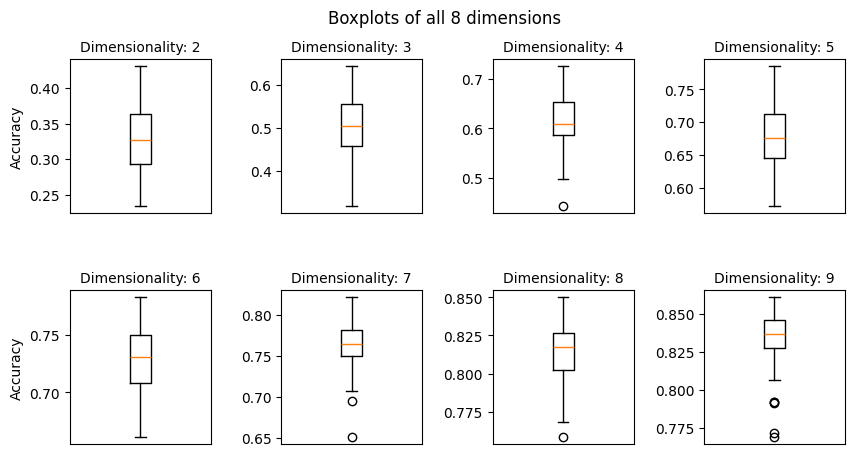

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.boxplot(accuracy_dict[list(accuracy_dict.keys())[i]])
    ax.xaxis.set_visible(False)
    ax.set_title(f"Dimensionality: {i+2}", fontdict={'fontsize': 10})
axes[0, 0].set_ylabel("Accuracy")
axes[1, 0].set_ylabel("Accuracy")
plt.suptitle("Boxplots of all 8 dimensions")
plt.show()